# LOGISTIC REGRESSION

### Logistic regression is a method used to predict a dependent variable, given a set of independent variables, such that the dependent variable is categorical.
### Dependent variables (Y): The response binary variable holding values like 0 or 1, Yes or No.
### Independent variable (X): The predictor variable used to predict the response variable.

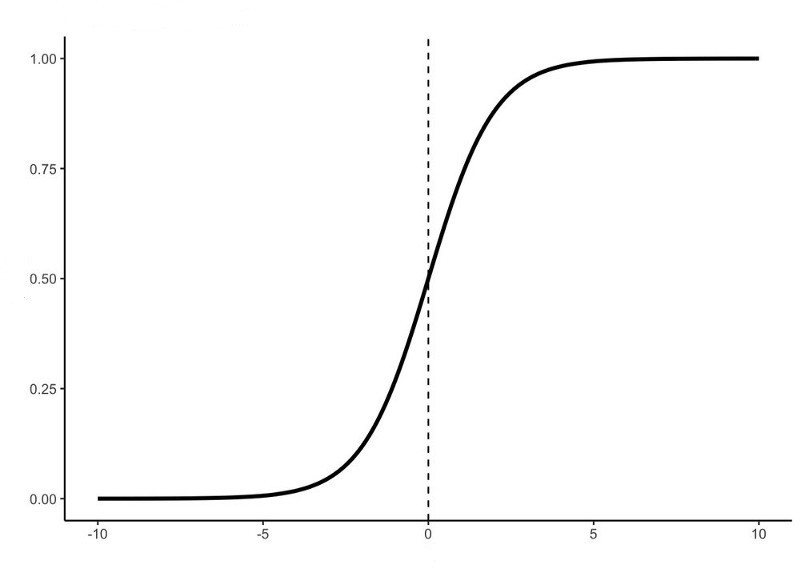

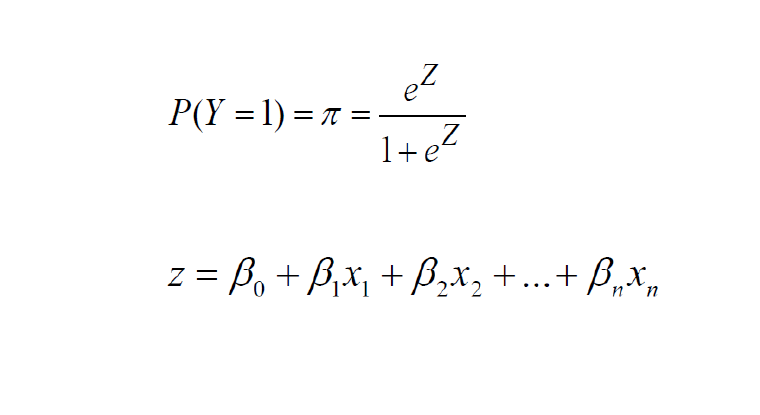

## Bank: Term Deposit Case Study

### The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

### y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

#### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing

In [2]:
os.chdir(r'G:\Ivy Pro Data Science, AI and Machine L\PYTHON\03LOGISTIC_REGRESSION\Case1')
os.getcwd()

'G:\\Ivy Pro Data Science, AI and Machine L\\PYTHON\\03LOGISTIC_REGRESSION\\Case1'

#### Import dataset

In [3]:
df = pd.read_csv('Banking.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
# Basic EDA

In [6]:
df.shape

(41188, 21)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [9]:
# Now we will check the descriptive statistics of our numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
# For both numerical and categorical variables
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


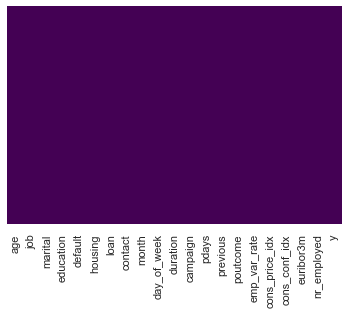

In [11]:
#checking for null values
print(df.isnull().sum())

# to see missing value using visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Exploratory Data Analysis

### Univariate Analysis
Exploring categorical variables

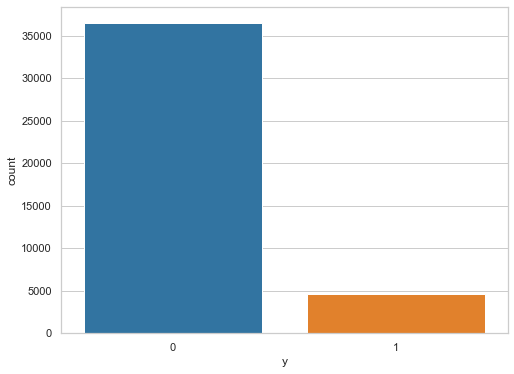

In [12]:
# Dependent variable distribution
plt.figure(figsize=(8,6))
sns.countplot(x='y',data=df, palette='tab10')
plt.show()

In [13]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [15]:
count_term_not_deposit = len(df[df.y == 0])
count_term_deposit = len(df[df.y == 1])
print("Percentage of Customers Haven't Subscribed to Term Deposit: {:.2f}%".format((count_term_not_deposit / (len(df.y))*100)))
print("Percentage of Customers Have Subscribed to Term Deposit: {:.2f}%".format((count_term_deposit / (len(df.y))*100)))

Percentage of Customers Haven't Subscribed to Term Deposit: 88.73%
Percentage of Customers Have Subscribed to Term Deposit: 11.27%


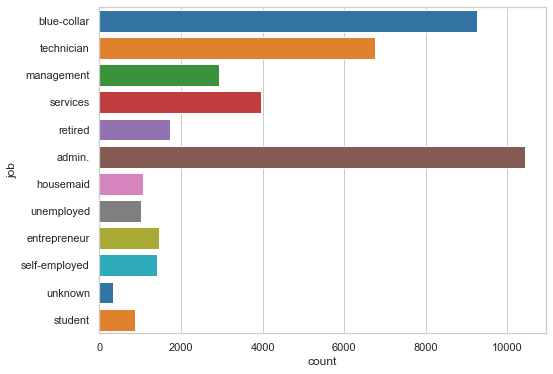

In [16]:
#Customer job distribution
plt.figure(figsize=(8,6))
sns.countplot(y="job", data=df, palette='tab10')
plt.show()

In [17]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

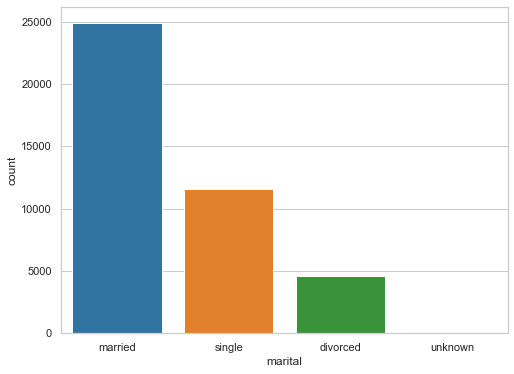

In [18]:
# marital status distribution
plt.figure(figsize=(8,6))
sns.countplot(x='marital',data=df, palette='tab10')
plt.show()

In [19]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

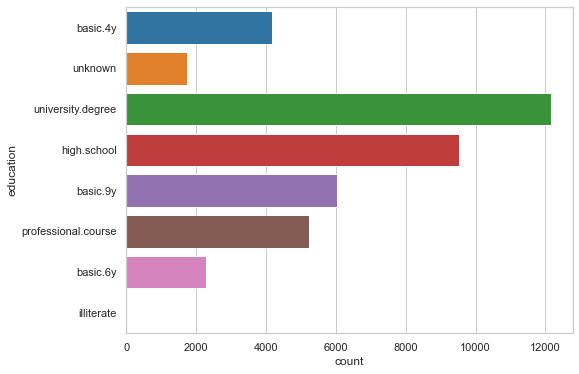

In [20]:
# Education distribution
plt.figure(figsize=(8,6))
sns.countplot(y='education',data=df, palette='tab10')
plt.show()

In [21]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

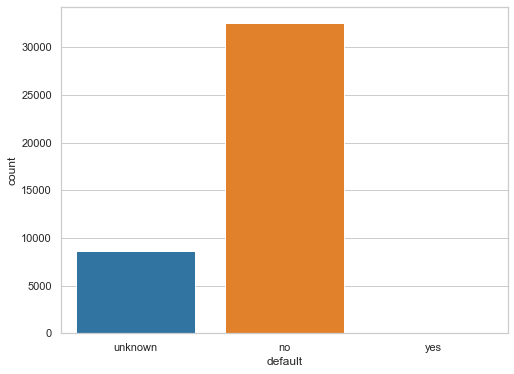

In [22]:
# credit in default distribution
plt.figure(figsize=(8,6))
sns.countplot(x='default',data=df, palette='tab10')
plt.show()

In [23]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

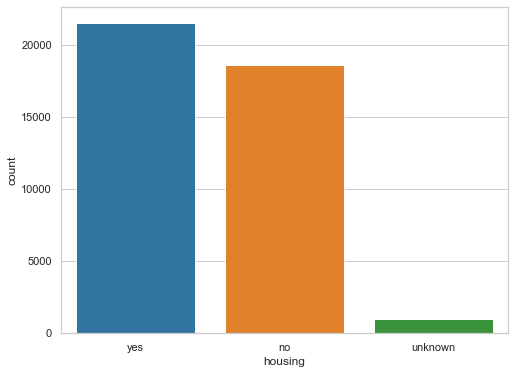

In [24]:
# housing loan distribution
plt.figure(figsize=(8,6))
sns.countplot(x='housing',data=df, palette='tab10')
plt.show()

In [25]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

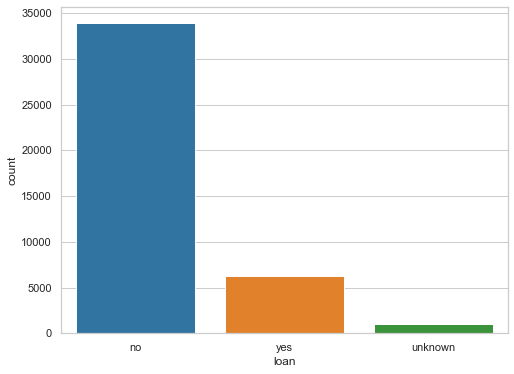

In [26]:
#personal loan distribution
plt.figure(figsize=(8,6))
sns.countplot(x='loan',data=df, palette='tab10')
plt.show()

In [27]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

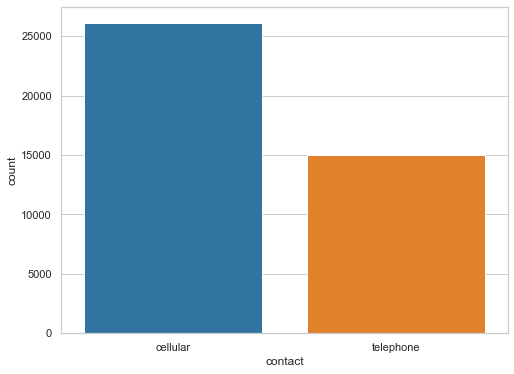

In [28]:
# conctact type distribution
plt.figure(figsize=(8,6))
sns.countplot(x='contact',data=df, palette='tab10')
plt.show()

In [29]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

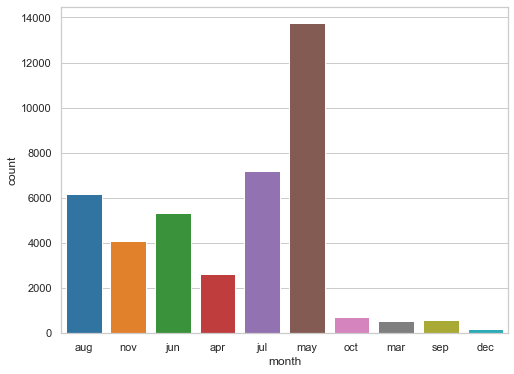

In [30]:
# month distribution
plt.figure(figsize=(8,6))
sns.countplot(x='month',data=df, palette='tab10')
plt.show()

In [31]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

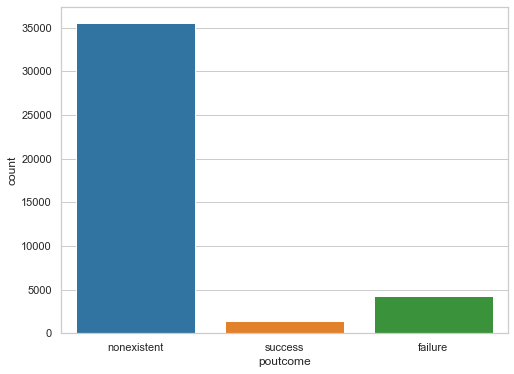

In [32]:
#previous marketing loan outcome distribution
plt.figure(figsize=(8,6))
sns.countplot(x='poutcome',data=df, palette='tab10')
plt.show()

In [33]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

### Bi-Variate Analysis
Exploring Numerical variables

In [34]:
categorical_col=[]
numerical_col=[]

for col in df.columns[:-1]:
  if df[col].dtype =="object":
    categorical_col.append(col)
  elif df[col].dtype =="int64" or df[col].dtype =="float64":
    numerical_col.append(col)

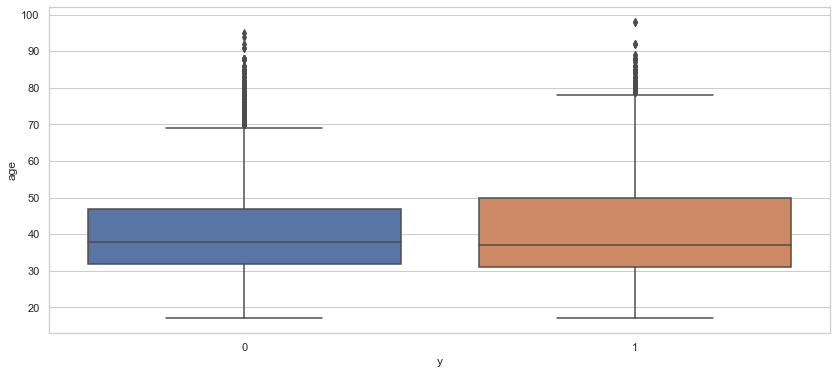

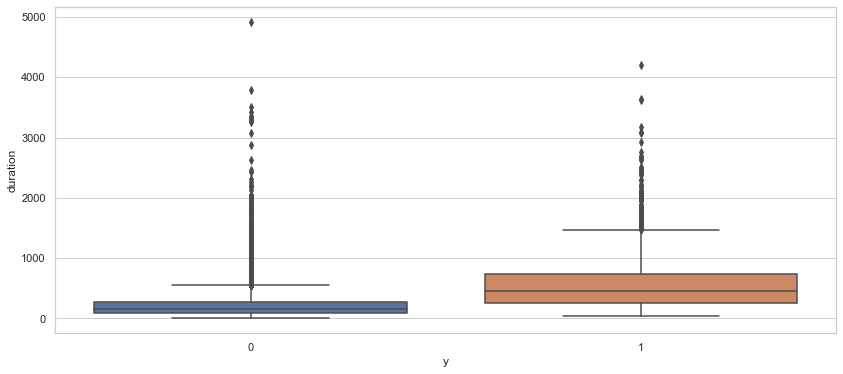

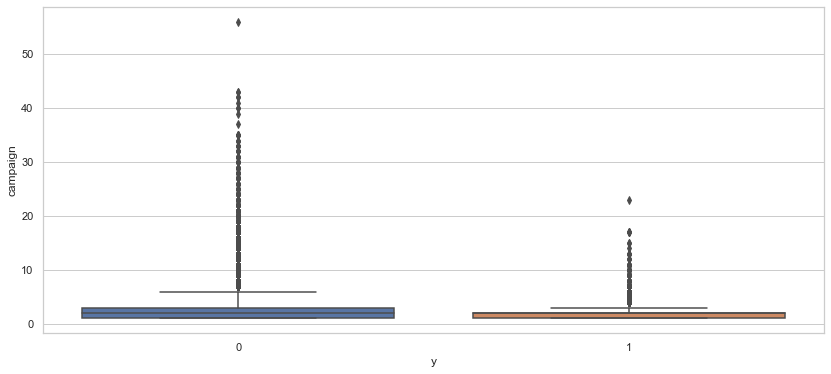

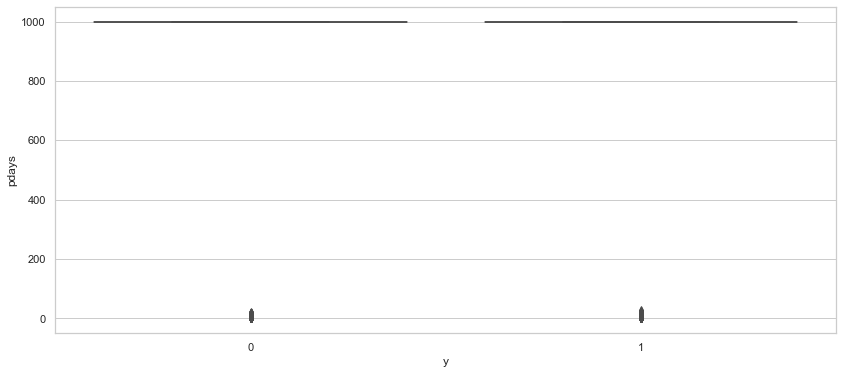

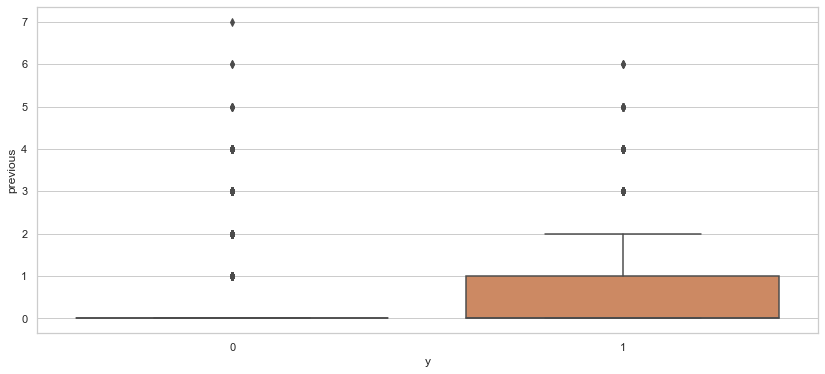

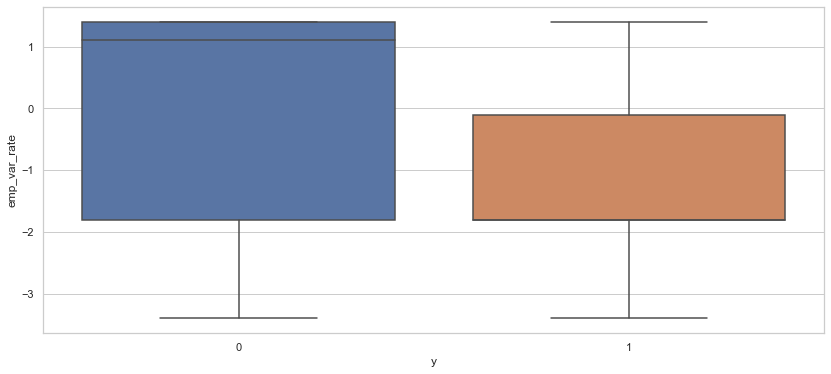

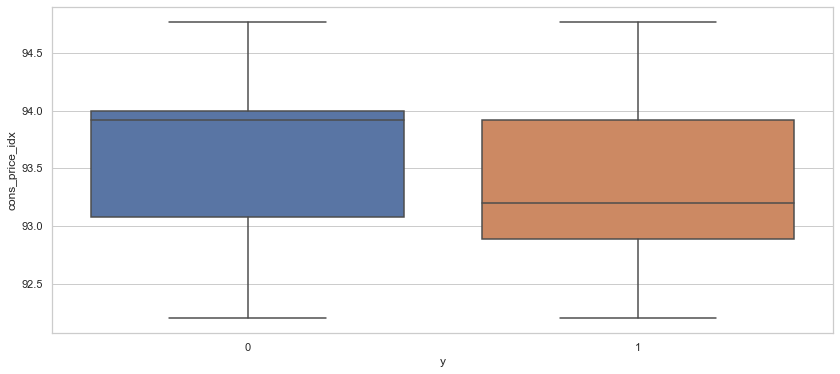

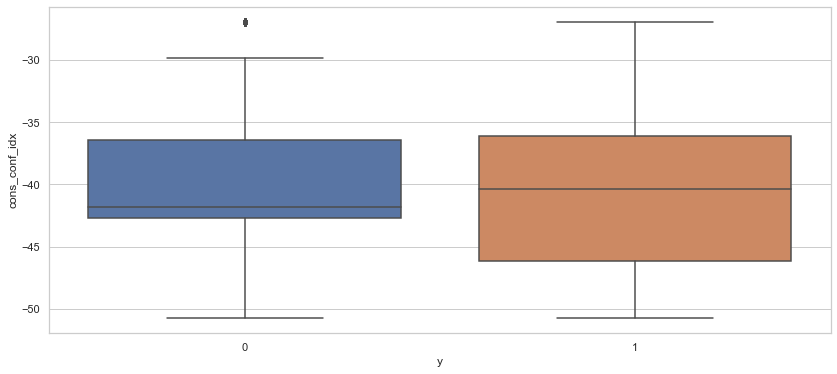

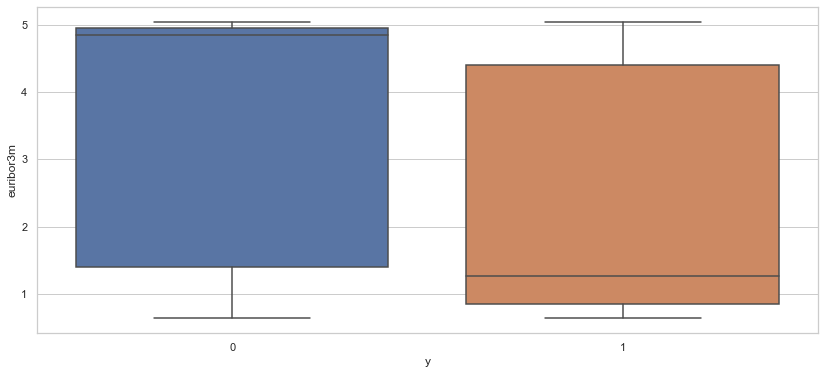

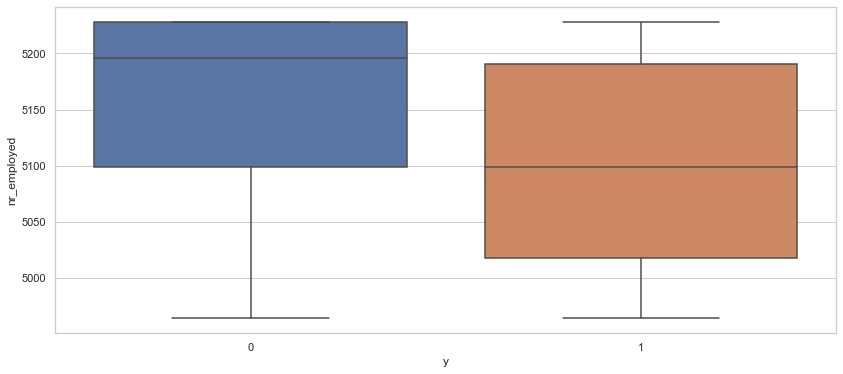

In [35]:
for col in numerical_col:
    plt.figure(figsize=(14,6))
    sns.boxplot(x="y", y=col, data=df)
    plt.show()

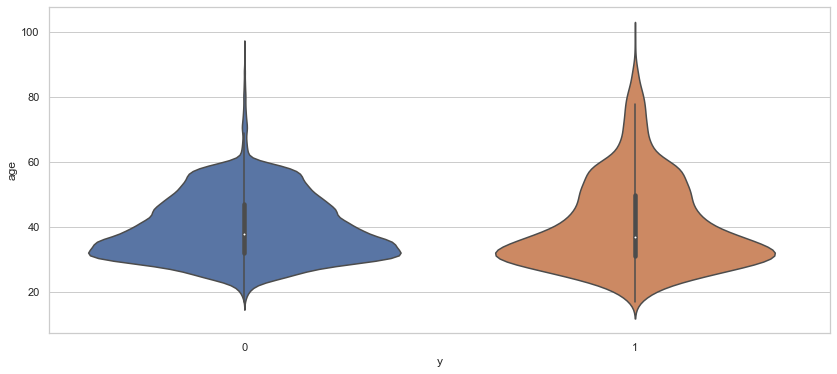

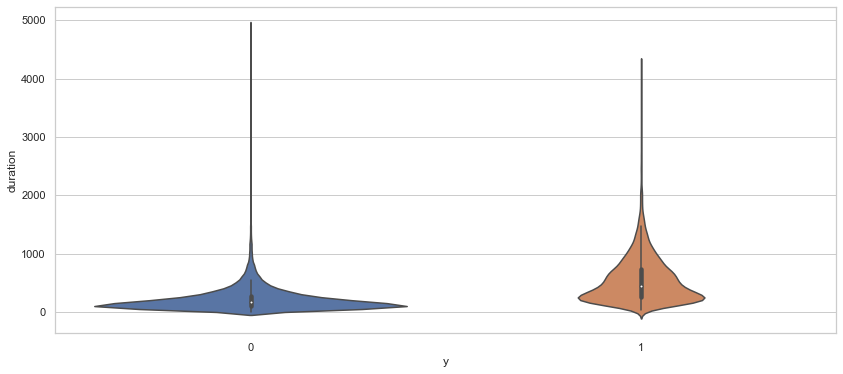

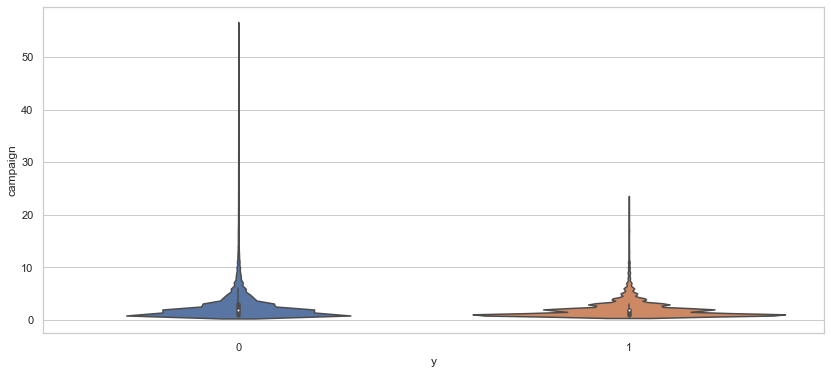

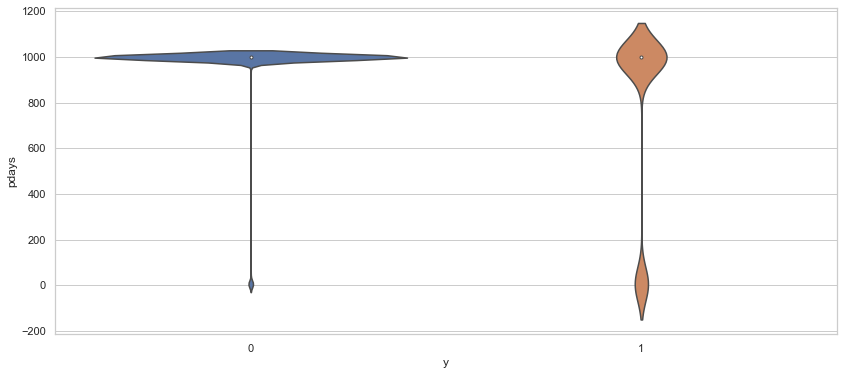

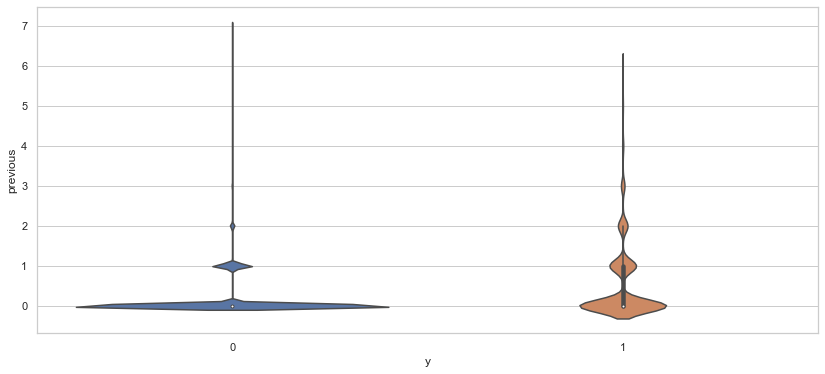

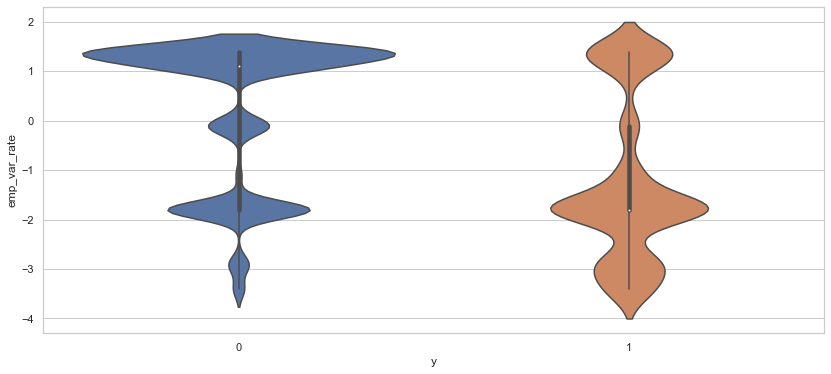

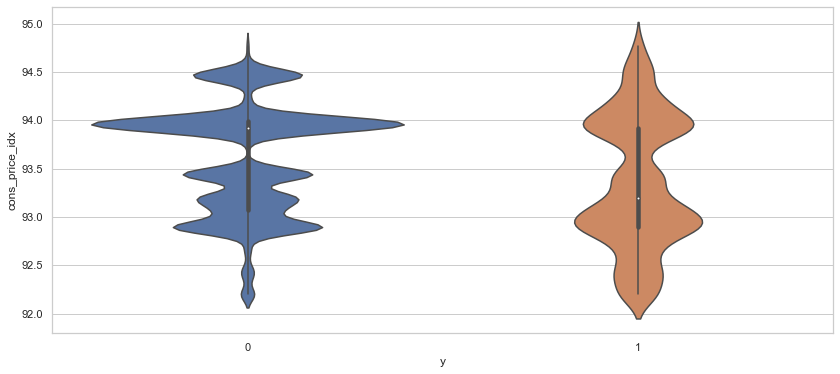

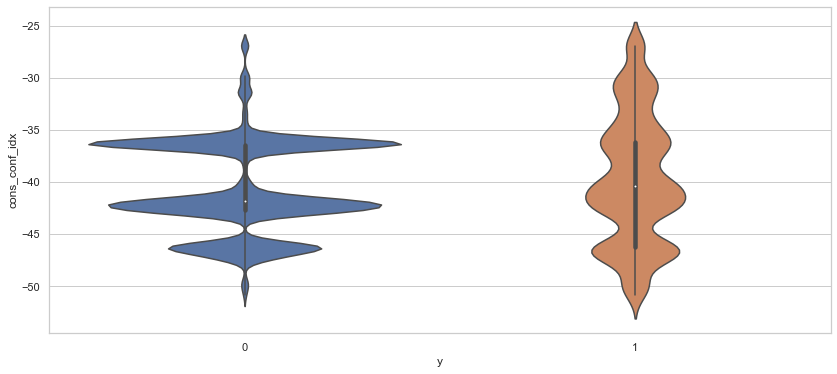

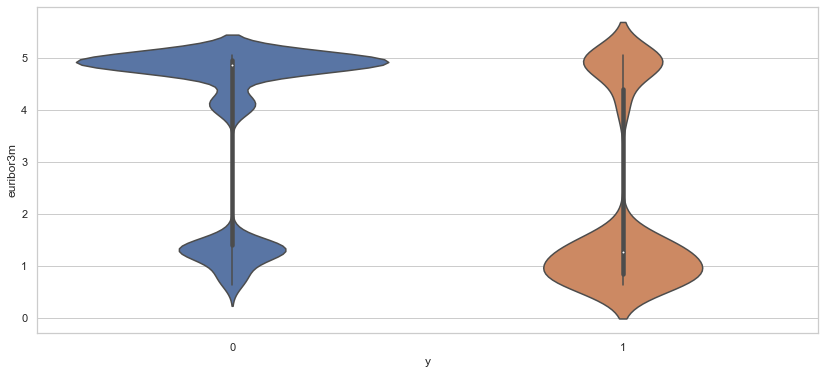

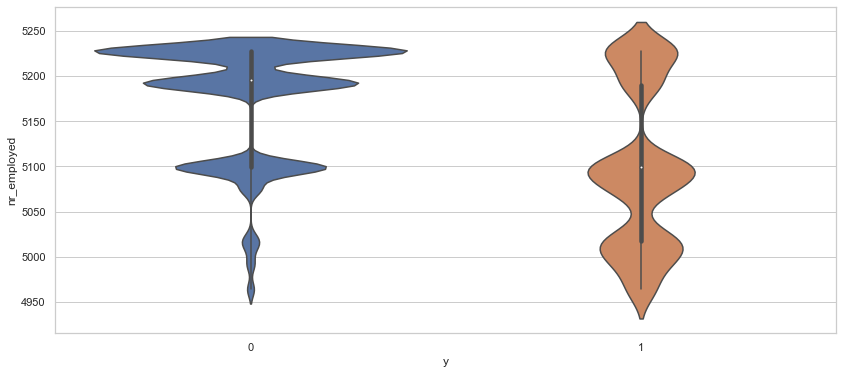

In [36]:
for col in numerical_col:
    plt.figure(figsize=(14,6))
    sns.violinplot(x="y", y=col, data=df)
    plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### Mutivariate Analysis

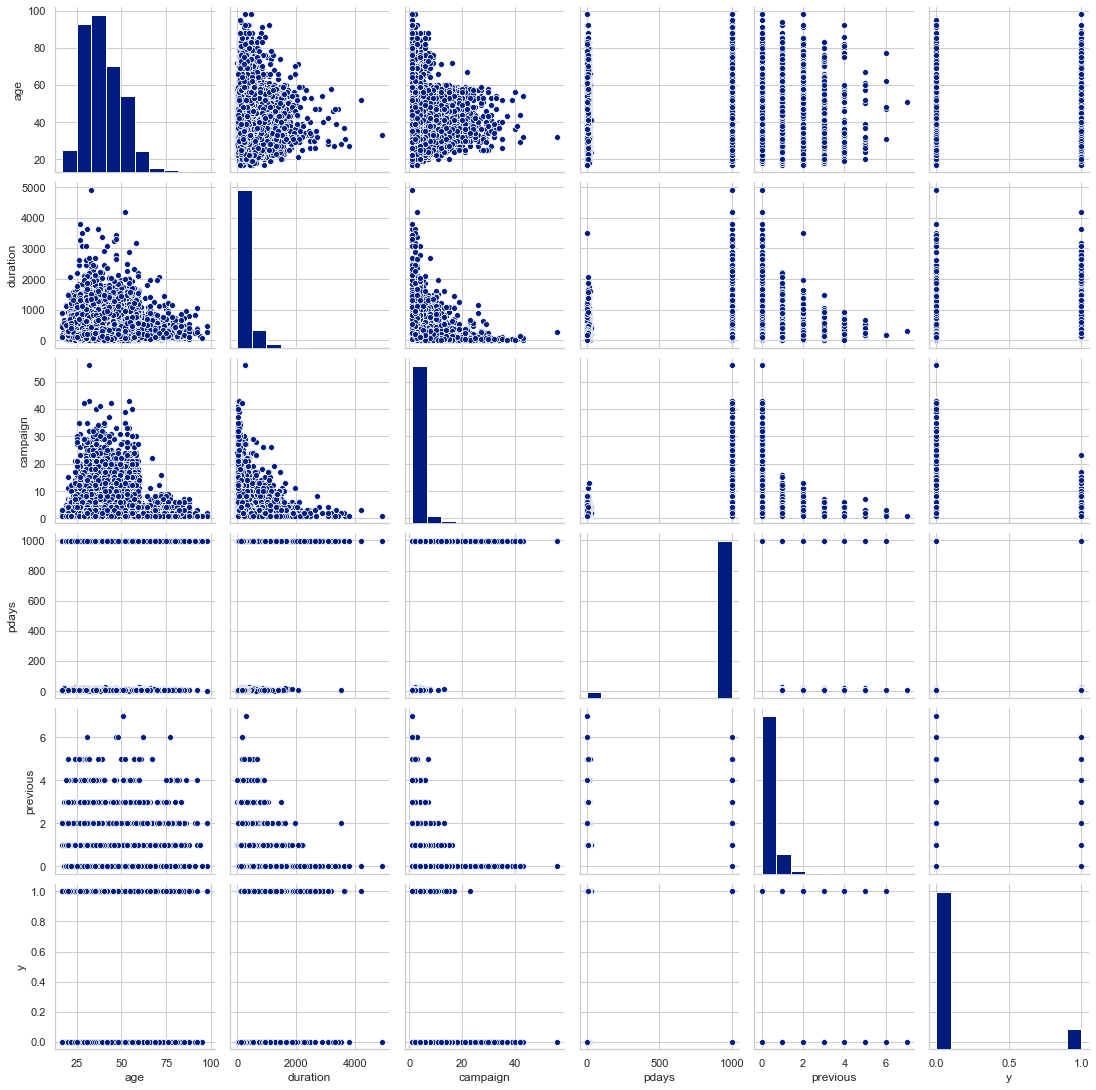

In [38]:
sns.set_palette("dark")
sns.set_style('whitegrid')
sns.pairplot(df[['age','duration','campaign','pdays','previous','y']])
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [40]:
# OneHotEncoder
# creating dummies for categorical variables
X_Dummies = pd.get_dummies(df[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']])

In [41]:
X_Dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [42]:
df = df.drop(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],axis=1)

In [43]:
labelencoder = LabelEncoder()

In [44]:
#Label Encoding for education variable
df.iloc[:, 1] = labelencoder.fit_transform(df.iloc[:, 1])

In [45]:
df['education'].unique()

array([0, 7, 6, 3, 2, 5, 1, 4])

In [46]:
df2 = pd.concat([df,X_Dummies],axis=1)

In [47]:
#Now checking the dataframe again
df2.head()

,age,education,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,0,210,1,999,0,1.4,93.444,-36.1,4.963,...,0,0,0,0,1,0,0,0,1,0
1,53,7,138,1,999,0,-0.1,93.200,-42.0,4.021,...,0,0,1,0,0,0,0,0,1,0
2,28,6,339,3,6,2,-1.7,94.055,-39.8,0.729,...,0,0,0,0,1,0,0,0,0,1
3,39,3,185,2,999,0,-1.8,93.075,-47.1,1.405,...,0,0,1,0,0,0,0,0,1,0
4,55,0,137,1,3,1,-2.9,92.201,-31.4,0.869,...,0,0,1,0,0,0,0,0,0,1


In [48]:
df2.columns

Index(['age', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
     

In [49]:
#Drop the unknown columns
df2.drop(['job_unknown','marital_unknown','default_unknown','housing_unknown','loan_unknown'], axis=1, inplace=True)

In [50]:
df2.head()

,age,education,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,0,210,1,999,0,1.4,93.444,-36.1,4.963,...,0,0,0,0,1,0,0,0,1,0
1,53,7,138,1,999,0,-0.1,93.200,-42.0,4.021,...,0,0,1,0,0,0,0,0,1,0
2,28,6,339,3,6,2,-1.7,94.055,-39.8,0.729,...,0,0,0,0,1,0,0,0,0,1
3,39,3,185,2,999,0,-1.8,93.075,-47.1,1.405,...,0,0,1,0,0,0,0,0,1,0
4,55,0,137,1,3,1,-2.9,92.201,-31.4,0.869,...,0,0,1,0,0,0,0,0,0,1


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             41188 non-null  int32  
 2   duration              41188 non-null  int64  
 3   campaign              41188 non-null  int64  
 4   pdays                 41188 non-null  int64  
 5   previous              41188 non-null  int64  
 6   emp_var_rate          41188 non-null  float64
 7   cons_price_idx        41188 non-null  float64
 8   cons_conf_idx         41188 non-null  float64
 9   euribor3m             41188 non-null  float64
 10  nr_employed           41188 non-null  float64
 11  y                     41188 non-null  int64  
 12  job_admin.            41188 non-null  uint8  
 13  job_blue-collar       41188 non-null  uint8  
 14  job_entrepreneur      41188 non-null  uint8  
 15  job_housemaid      

In [52]:
# Correlation Matrix for Continuous variables
df2.iloc[:,[0,2,3,4,6,7,8,9,10,11]].corr()

,age,duration,campaign,pdays,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.030399,0.405274,-0.066357,-0.324914,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


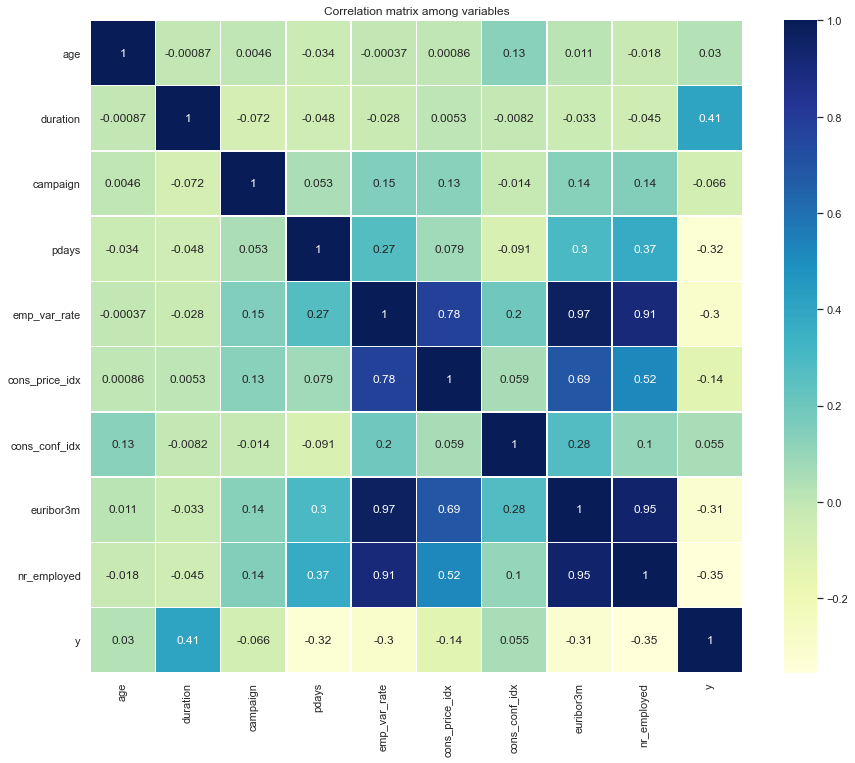

In [53]:
# Heatmap for Continuous variables
plt.figure(figsize=(15,12))
sns.heatmap(df2.iloc[:,[0,2,3,4,6,7,8,9,10,11]].corr(), square=True, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title("Correlation matrix among variables")
plt.show()

#### Creating the Independendent and Dependent Data Sets

In [54]:
# Feature or Independent variables
X = df2.drop(["y"],axis = 1)

In [55]:
X.head()

,age,education,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,0,210,1,999,0,1.4,93.444,-36.1,4.963,...,0,0,0,0,1,0,0,0,1,0
1,53,7,138,1,999,0,-0.1,93.200,-42.0,4.021,...,0,0,1,0,0,0,0,0,1,0
2,28,6,339,3,6,2,-1.7,94.055,-39.8,0.729,...,0,0,0,0,1,0,0,0,0,1
3,39,3,185,2,999,0,-1.8,93.075,-47.1,1.405,...,0,0,1,0,0,0,0,0,1,0
4,55,0,137,1,3,1,-2.9,92.201,-31.4,0.869,...,0,0,1,0,0,0,0,0,0,1


In [56]:
# Label or Dependent variable
y = df2["y"]

In [57]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

#### Model Building

In [58]:
# Splitting the dataset into the Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [60]:
X_train.shape

(28831, 51)

In [61]:
X_test.shape

(12357, 51)

In [62]:
y_train.shape

(28831,)

In [63]:
y_test.shape

(12357,)

#### Standarisation of data

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

In [66]:
X_test_scaled = scaler.transform(X_test)

#### Synthetic Minority Oversampling Technique (SMOTE) to solve the problem of Imbalanced Data

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
os = SMOTE(random_state=0)
columns = X_train.columns

In [69]:
#On Train Data
X_train_SMOTE,y_train_SMOTE = os.fit_resample(X_train_scaled, y_train)
X_train_SMOTE = pd.DataFrame(data = X_train_SMOTE,columns=columns )
y_train_SMOTE = pd.DataFrame(data = y_train_SMOTE,columns=['y'])

In [70]:
#On Test Data
X_test_SMOTE,y_test_SMOTE = os.fit_resample(X_test_scaled, y_test)
X_test_SMOTE = pd.DataFrame(data = X_test_SMOTE,columns=columns )
y_test_SMOTE = pd.DataFrame(data = y_test_SMOTE,columns=['y'])

### Logistic Regression Model

In [71]:
# Fitting Multiple Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_SMOTE, y_train_SMOTE)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Prediction of the Model

In [72]:
# Predicting the Test (Test_Scaled) set results 
y_pred = classifier.predict(X_test_scaled)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [75]:
confusion_matrix

array([[9502, 1479],
       [ 169, 1207]], dtype=int64)

#### Confusion matrix

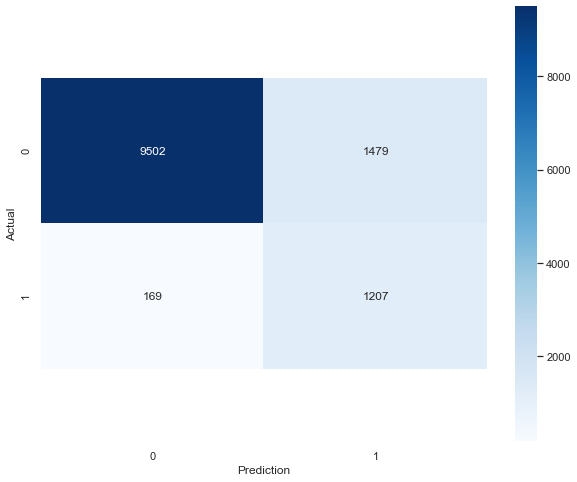

In [76]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [77]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10981
           1       0.45      0.88      0.59      1376

    accuracy                           0.87     12357
   macro avg       0.72      0.87      0.76     12357
weighted avg       0.92      0.87      0.88     12357

Accuracy of logistic regression classifier on test set: 0.87


C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### ROC AUC CURVE

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


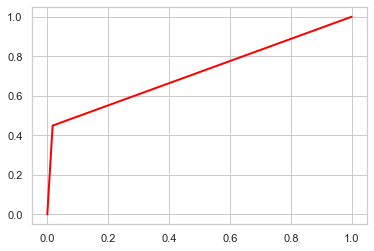

In [79]:
##Computing false and true positive rates
fpr, tpr,_= roc_curve(classifier.predict(X_test_scaled),y_test,drop_intermediate=False)

#plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

In [80]:
roc_auc_score(classifier.predict(X_test_scaled),y_test)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7159460817869946

### Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_SMOTE, y_train_SMOTE)

<ipython-input-81-354d4f76755e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_SMOTE, y_train_SMOTE)


RandomForestClassifier()

In [82]:
rfc_pred = rfc.predict(X_test_scaled)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [83]:
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)

In [85]:
cm

array([[10373,   608],
       [  508,   868]], dtype=int64)

#### Confusion matrix

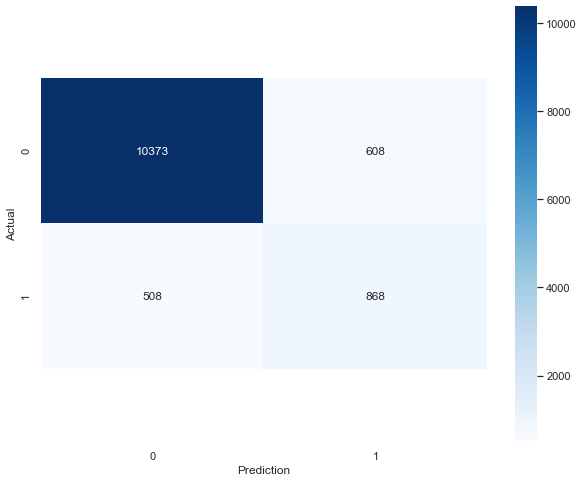

In [86]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [87]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rfc.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10981
           1       0.59      0.63      0.61      1376

    accuracy                           0.91     12357
   macro avg       0.77      0.79      0.78     12357
weighted avg       0.91      0.91      0.91     12357



C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy of logistic regression classifier on test set: 0.91


### If we compare logistic regression model with random forest, the accurcay and f1-score is coming much better than logistic model.
### We can say that Random forest model is better approach.

### MODEL STATISTCS

In [89]:
import statsmodels.api as sm

In [90]:
#Adding Intercept term to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [92]:
#Printing the Model Statistics
model = sm.Logit(y_train,X_train).fit()
model.summary()

         Current function value: 0.209605
         Iterations: 35


C:\Users\Ali\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Ali\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28784
Method:                           MLE   Df Model:                           46
Date:                Thu, 07 Oct 2021   Pseudo R-squ.:                  0.4065
Time:                        11:43:27   Log-Likelihood:                -6043.1
converged:                      False   LL-Null:                       -10182.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -122.9803        nan        nan        nan         nan         nan
age                      0.0006      0.003      0.200      0.842      -0.005       0.006
education                0.0241      0.014      1.743      0.081      -0.003       0.051
duration                 0.0047   8.86e-05     52.696      0.000       0.004       0.005
campaign                -0.0332      0.014     -2.449      0.014      -0.060      -0.007
pdays                   -0.0011      0.000     -4.077      0.000      -0.002      -0.001
previous                -0.0720      0.071     -1.020      0.308      -0.210       0.066
emp_var_rate            -1.8305      0.171    -10.731      0.000      -2.165      -1.496
cons_price_idx           2.3456      0.301      7.780      0.000       1.755       2.936
cons_conf_idx            0.0256      0.009      2.788      0.005       0.008       0.044
euribor3m                0.2562      0.153      1.676      0.094      -0.043       0.556
nr_employed              0.0082      0.004      2.204      0.028       0.001       0.015
job_admin.              -0.0706      0.271     -0.261      0.794      -0.602       0.461
job_blue-collar         -0.3620      0.276     -1.311      0.190      -0.903       0.179
job_entrepreneur        -0.3015      0.303     -0.994      0.320      -0.896       0.293
job_housemaid           -0.2562      0.316     -0.810      0.418      -0.876       0.364
job_management          -0.1081      0.281     -0.385      0.700      -0.659       0.443
job_retired              0.2057      0.286      0.720      0.471      -0.354       0.765
job_self-employed       -0.3900      0.299     -1.306      0.192      -0.976       0.195
job_services            -0.2092      0.281     -0.745      0.456      -0.759       0.341
job_student              0.1236      0.294      0.420      0.674      -0.453       0.700
job_technician          -0.1767      0.274     -0.644      0.520      -0.715       0.361
job_unemployed          -0.0643      0.301     -0.214      0.831      -0.654       0.526
marital_divorced         0.0003      0.494      0.001      1.000      -0.969       0.969
marital_married         -0.0441      0.490     -0.090      0.928      -1.004       0.915
marital_single           0.0303      0.491      0.062      0.951      -0.932       0.993
default_no               0.3374      0.080      4.212      0.000       0.180       0.494
default_yes            -18.6209   1.13e+05     -0.000      1.000   -2.22e+05    2.22e+05
housing_no               0.0293        nan        nan        nan         nan         nan
housing_yes             -0.0035        nan        nan        nan         nan         nan
loan_no                  0.0403        nan        nan        nan         nan         nan
loan_yes                -0.0144        nan        nan        nan         nan         nan
contact_cellular       -62.5020   2.34e+05     -0.000      1.000   -4.58e+05    4.58e+05
contact_telephone      -63.1287   3.8